# Thresholding

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#my functions
from Plot import plot_cv, plot_img

In [27]:
path = '../../Data/clock4.jpg'
img = cv.imread(path, cv.IMREAD_COLOR_RGB)
img.shape

(740, 740, 3)

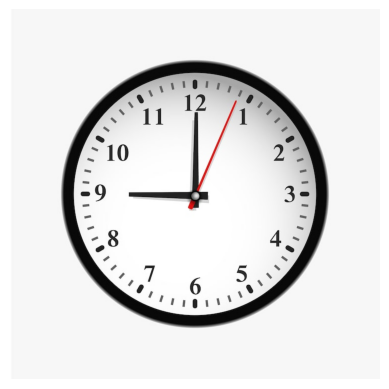

In [28]:
plot_img(img, gray = False)

In [29]:
def channels(img):
    Xred = img[:, :, 0]
    Xgreen = img[:, :, 1]
    Xblue = img[:, :, 2]
    return Xred, Xgreen, Xblue

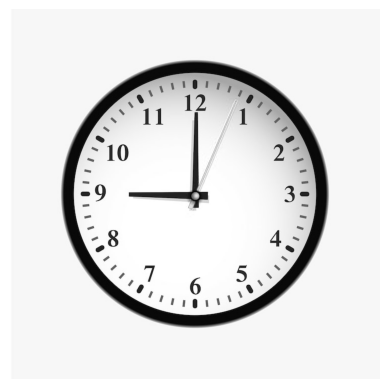

In [30]:
Xred, _, _ = channels(img)
plot_img(Xred)

In [31]:
def thresholding_background(img, thres = 200):
    print("Image shape:", img.shape)
    if len(img.shape) == 3:  
        m, n, _ = img.shape
    else: 
        m, n = img.shape
        
    temp = np.zeros((m, n), dtype=np.uint8)

    for i in range(m):
        for j in range(n):
            if img[i, j] >= thres:
                temp[i, j] = 0
            else:
                temp[i, j] = 255

    return temp


Image shape: (740, 740)


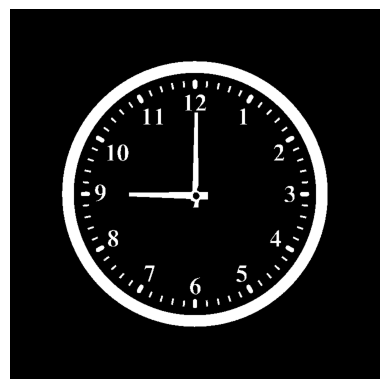

In [32]:
thres = 120
thres_img = thresholding_background(Xred, thres)
plot_img(thres_img)

In [33]:
def get_center(img):
    xs, ys = [], []
    M, N = img.shape

    for i in range(M):
        for j in range(N):
            if img[i, j] != 0:
                xs.append(i)
                ys.append(j) 
    return xs, ys

In [34]:
xs, ys = get_center(Xred)
center_x = int(np.mean(xs))
center_y = int(np.mean(ys))
center_x, center_y

(369, 369)

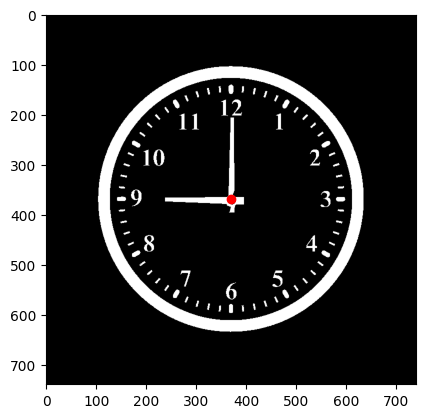

In [35]:
plt.imshow(thres_img, cmap = plt.cm.gray)
plt.plot(center_x, center_y, 'ro')
plt.show()

In [36]:
def radial_distances(binary_img, cx, cy):
    ys, xs = np.nonzero(binary_img)
    dists = np.sqrt((xs - cx)**2 + (ys - cy)**2)
    return dists

In [37]:
dists = radial_distances(thres_img, center_x, center_y)

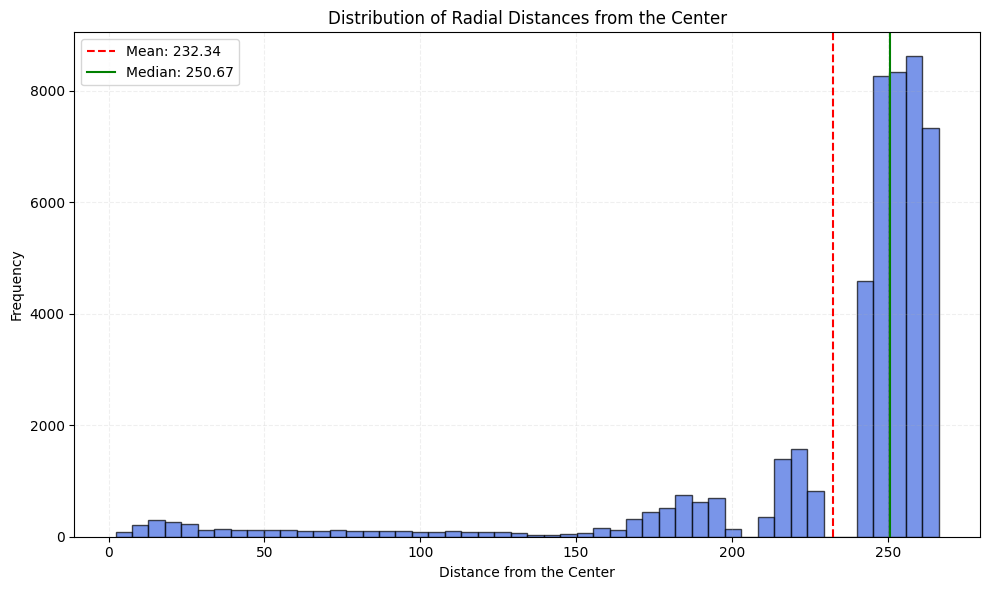

In [38]:
plt.figure(figsize=(10, 6)) 
plt.hist(dists, bins=50, color='royalblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Radial Distances from the Center')
plt.xlabel('Distance from the Center')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.2)

plt.axvline(x=np.mean(dists), color='red', linestyle='--', label=f'Mean: {np.mean(dists):.2f}')
plt.axvline(x=np.median(dists), color='green', linestyle='-', label=f'Median: {np.median(dists):.2f}')

plt.legend()
plt.tight_layout()
plt.show()

## Sobel

In [39]:
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

In [40]:
def apply_sobel(img, kernel):
    m, n = img.shape
    km, kn = kernel.shape
    pad_m, pad_n = km//2, kn//2
    padded = np.pad(img, ((pad_m,pad_m),(pad_n,pad_n)), mode='reflect')
    out = np.zeros_like(img, dtype=float)

    for i in range(m):
        for j in range(n):
            region = padded[i:i+km, j:j+kn]
            out[i,j] = np.sum(region * kernel)
    return out

In [41]:
edx = apply_sobel(thres_img, sobel_x)
edy = apply_sobel(thres_img, sobel_y)
edge_dt = np.sqrt(edx**2 + edy**2)

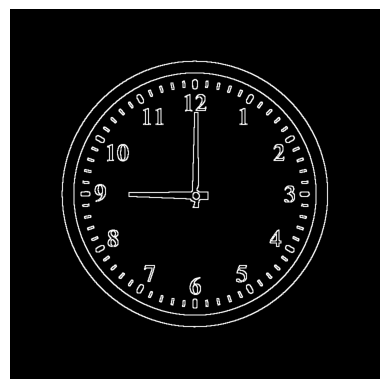

In [42]:
edges = (edge_dt > np.percentile(edge_dt, 90)).astype(np.uint8)
plot_img(edges)

In [43]:
M = cv.moments(edges)
mom_cx = int(M['m10'] / M['m00'])
mom_cy = int(M['m01'] / M['m00'])
mom_cx, mom_cy

(364, 364)

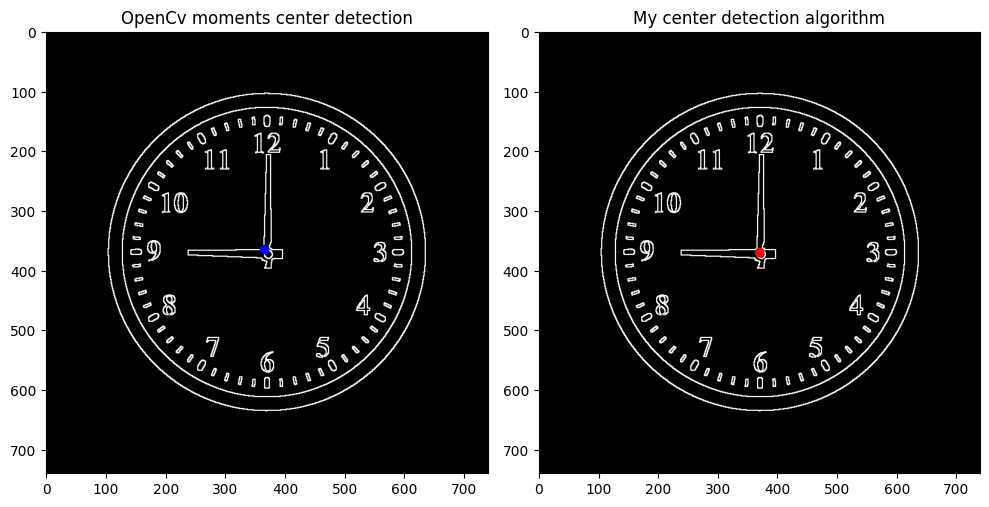

In [44]:
figs_size = 2
fig, axes = plt.subplots(1, figs_size, figsize=(10, 5))

for i in range(figs_size):
    axes[i].imshow(edges, cmap=plt.cm.gray)
    if i == 0:
        axes[i].plot(mom_cx, mom_cy, 'bo')
        axes[i].set_title("OpenCv moments center detection")
    else:
        axes[i].plot(center_x, center_y, 'ro') 
        axes[i].set_title("My center detection algorithm")


plt.tight_layout()
plt.show()

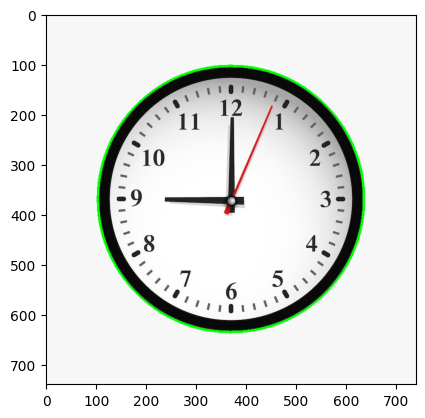

In [45]:
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

circled = img.copy()

cv.drawContours(circled, contours, -1, (0, 255, 0), 3)

plt.imshow(circled)
plt.show()

In [46]:
contours

(array([[[365, 103]],
 
        [[364, 104]],
 
        [[363, 104]],
 
        ...,
 
        [[368, 103]],
 
        [[367, 103]],
 
        [[366, 103]]], shape=(1510, 1, 2), dtype=int32),)

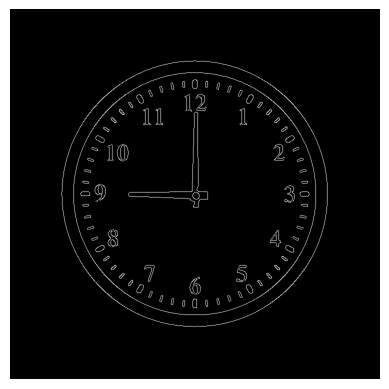

In [47]:
canny = cv.Canny(thres_img, 50, 100)

plot_img(canny)

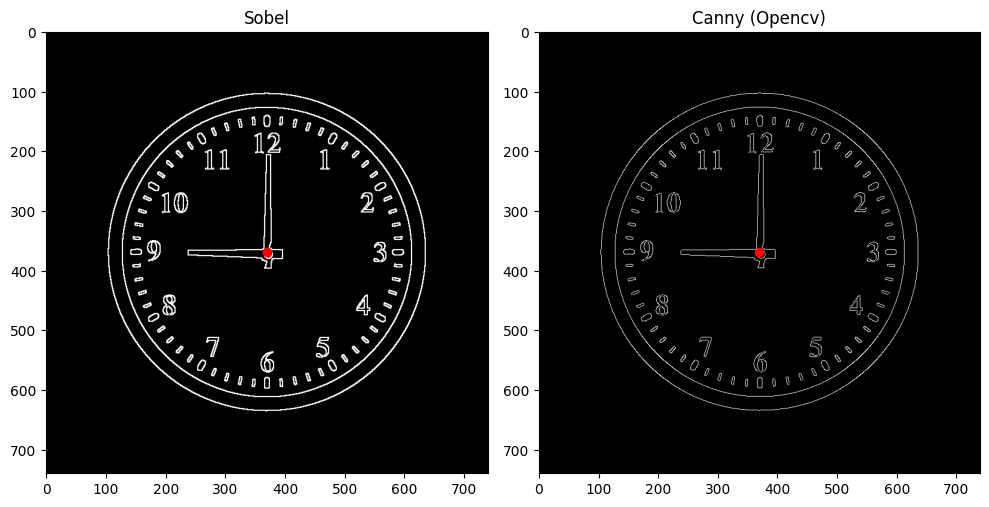

In [48]:
figs_size = 2
fig, axes = plt.subplots(1, figs_size, figsize=(10, 5))

for i in range(figs_size):
    if i == 0:
        axes[i].imshow(edges, cmap=plt.cm.gray)
        axes[i].plot(center_x, center_y, 'ro') 
        axes[i].set_title("Sobel")
    else:
        axes[i].imshow(canny, cmap=plt.cm.gray)
        axes[i].plot(center_x, center_y, 'ro') 
        axes[i].set_title("Canny (Opencv)")


plt.tight_layout()
plt.show()